In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler , MinMaxScaler, StandardScaler
import seaborn as sns
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Input,Flatten,Conv1D,MaxPooling1D
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import LSTM
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import MinMaxScaler


## With Near Miss Under-Sampling With Evaluation

In [2]:
df= pd.read_csv('heart2020python.csv')
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3,30,0,0,8,4,2,1,2,5,1,0,1
1,0,20.34,0,0,1,0,0,0,0,13,4,0,1,2,7,0,0,0
2,0,26.58,1,0,0,20,30,0,1,10,4,2,1,4,8,1,0,0
3,0,24.21,0,0,0,0,0,0,0,12,4,0,0,3,6,0,0,1
4,0,23.71,0,0,0,28,0,1,0,5,4,0,1,2,8,0,0,0


In [3]:
df.drop(['DiffWalking',"SleepTime"],axis=1,inplace=True)


In [4]:
df.shape
df['HeartDisease'].value_counts()


HeartDisease
0    292422
1     27373
Name: count, dtype: int64

In [5]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)

## splite data

In [6]:
x = df.drop(["HeartDisease"] , axis = 1).values
y = df["HeartDisease"].values

In [7]:
nr = NearMiss()
x_NM, y_NM = nr.fit_resample(x, y)
x_train5, x_test5, y_train5, y_test5 = train_test_split(x_NM, y_NM, test_size=0.25, random_state=42)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train5 = scaler.fit_transform(x_train5)
x_test5 = scaler.transform(x_test5)
print(len(x_train5), len(y_train5))
print(len(x_test5), len(y_test5))

40407 40407
13469 13469


## Random Forest

In [9]:



# Inicjalizacja modelu z domyślnymi parametrami
rf = RandomForestClassifier()

# Określenie siatki parametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew
    'max_depth': [10, 20, 30],        # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4, 6],   # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2, 4],    # Minimalna liczba próbek wymagana w liściu
    'max_features': ['auto', 'sqrt']  # Liczba cech do rozważenia przy każdym podziale
}

# Utworzenie obiektu GridSearchCV
cv_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
cv_rf.fit(x_train5, y_train5)

# Najlepszy zestaw parametrów
print("Najlepsze parametry: ", cv_rf.best_params_)

# Najlepszy estimator
best_rf = cv_rf.best_estimator_

# Predykcje i ocena modelu
ypred_train = best_rf.predict(x_train5)
ypred_test = best_rf.predict(x_test5)

print("Training Results\n")
print(classification_report(y_train5, ypred_train))
print("Test Results\n")
print(classification_report(y_test5, ypred_test))

# Macierz pomyłek
conf_matrix = confusion_matrix(y_test5, ypred_test)
print("Confusion Matrix:\n", conf_matrix)

# Ocena modelu za pomocą walidacji krzyżowej
cross_val_scores = cross_val_score(best_rf, x_train5, y_train5, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

Najlepsze parametry:  {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}
Training Results

              precision    recall  f1-score   support

           0       0.82      0.93      0.87     20189
           1       0.92      0.79      0.85     20218

    accuracy                           0.86     40407
   macro avg       0.87      0.86      0.86     40407
weighted avg       0.87      0.86      0.86     40407

Test Results

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      6749
           1       0.91      0.77      0.83      6720

    accuracy                           0.85     13469
   macro avg       0.85      0.85      0.84     13469
weighted avg       0.85      0.85      0.84     13469

Confusion Matrix:
 [[6227  522]
 [1555 5165]]
Cross-validation scores: [0.84323187 0.84248948 0.84420245 0.84667739 0.84333622]
Average cross-validation score: 0.8439874836936989


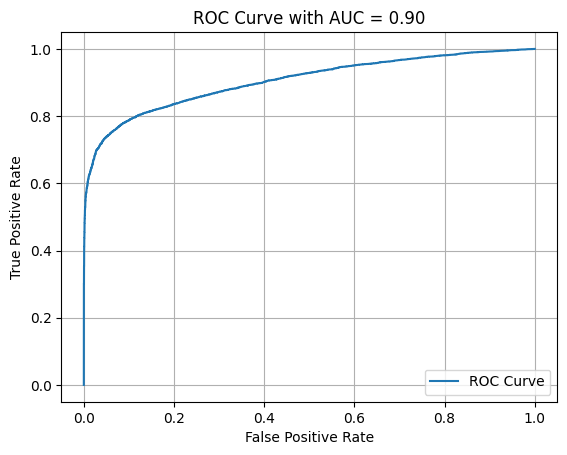

In [10]:


y_proba_test = best_rf.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## DECISION TREE CLASSIFIER

In [11]:


# Parametry do przetestowania w Grid Search
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5],
    'criterion': ['gini', 'entropy']
}

# Utworzenie modelu drzewa decyzyjnego
tree = DecisionTreeClassifier()

# Uruchomienie Grid Search z walidacją krzyżową
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train5, y_train5)

# Wyświetlenie najlepszych parametrów i wyników
print("Najlepsze parametry:", grid_search.best_params_)
print("Najlepsza dokładność:", grid_search.best_score_)

# Utworzenie i ocena modelu z najlepszymi parametrami
best_tree = grid_search.best_estimator_
best_tree.fit(x_train5, y_train5)

ypred_train2 = best_tree.predict(x_train5)
ypred_test2 = best_tree.predict(x_test5)

# Ocena modelu na zbiorze testowym

print("Training Results\n")
print(classification_report(y_train5, ypred_train2))
print('Testing Results\n')
print(classification_report(y_test5, ypred_test2))

# Dodatkowo: Walidacja krzyżowa dla najlepszego modelu na całym zbiorze danych
cross_val_scores = cross_val_score(best_tree, x_train5, y_train5, cv=5)
print("Cross-Validation Scores for the Best Model:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())

Najlepsze parametry: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 5}
Najlepsza dokładność: 0.8342861244573282
Training Results

              precision    recall  f1-score   support

           0       0.79      0.93      0.85     20189
           1       0.92      0.75      0.82     20218

    accuracy                           0.84     40407
   macro avg       0.85      0.84      0.84     40407
weighted avg       0.85      0.84      0.84     40407

Testing Results

              precision    recall  f1-score   support

           0       0.78      0.93      0.85      6749
           1       0.92      0.74      0.82      6720

    accuracy                           0.84     13469
   macro avg       0.85      0.84      0.84     13469
weighted avg       0.85      0.84      0.84     13469

Cross-Validation Scores for the Best Model: [0.83382826 0.8355605  0.83257023 0.83690137 0.83269397]
Average Cross-Validation Score: 0.8343108677449533


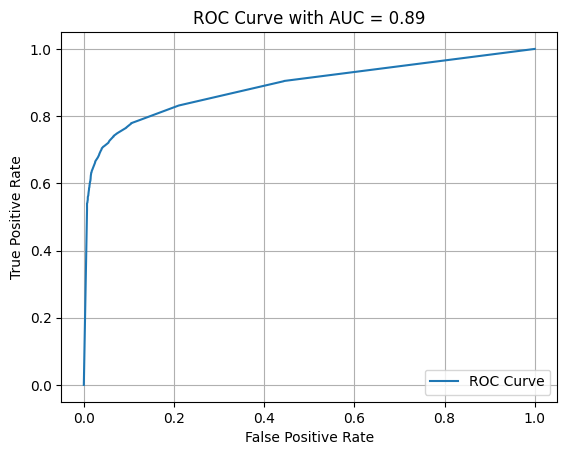

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_proba_test = best_tree.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## Naive Bayes

In [13]:
Gnb = GaussianNB()
Gnb.fit(x_train5, y_train5)
ypred_train3 = Gnb.predict(x_train5)
y_pred_test3 = Gnb.predict(x_test5)

print("Naive Bayes Classifier Accuracy: ",accuracy_score(y_test5, y_pred_test3))

Naive Bayes Classifier Accuracy:  0.781349766129631


In [14]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train3))

Training Results

              precision    recall  f1-score   support

           0       0.72      0.92      0.81     20189
           1       0.88      0.64      0.75     20218

    accuracy                           0.78     40407
   macro avg       0.80      0.78      0.78     40407
weighted avg       0.80      0.78      0.78     40407



In [15]:
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test3))

Testing Results

              precision    recall  f1-score   support

           0       0.72      0.92      0.81      6749
           1       0.89      0.64      0.74      6720

    accuracy                           0.78     13469
   macro avg       0.81      0.78      0.78     13469
weighted avg       0.81      0.78      0.78     13469



Cross-validation scores: [0.77839644 0.78742885 0.77750278 0.77935899 0.77713154]
Average cross-validation score: 0.7799637216856634


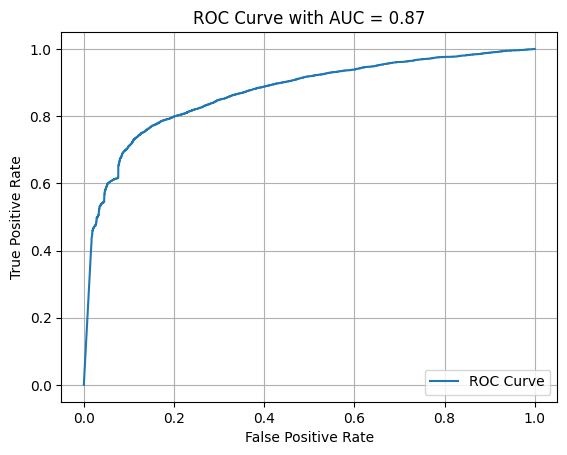

In [16]:
cross_val_scores = cross_val_score(Gnb, x_train5, y_train5, cv=5)
print("Cross-validation scores:", cross_val_scores)
print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = Gnb.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## XGBOSST

Najlepsze parametry:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Accuracy on Training set:  0.8565842552033064
Accuracy on Test set:  0.8481698715569085

Training Results

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     20189
           1       0.92      0.78      0.84     20218

    accuracy                           0.86     40407
   macro avg       0.87      0.86      0.86     40407
weighted avg       0.87      0.86      0.86     40407

Testing Results

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      6749
           1       0.92      0.77      0.83      6720

    accuracy                           0.85     13469
   macro avg       0.86      0.85      0.85     13469
weighted avg       0.86      0.85      0.85     13469



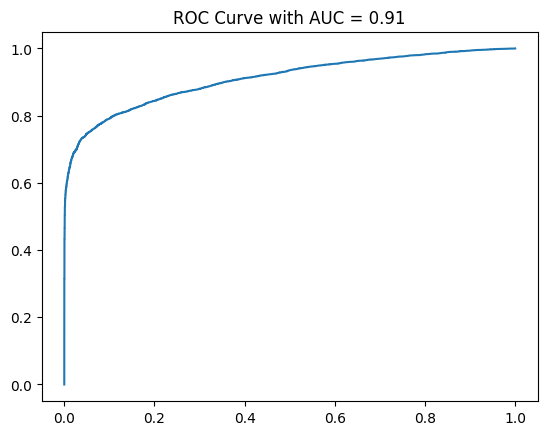

In [17]:

xg = XGBClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=xg, param_grid=param_grid, cv=3, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_xg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_xg.predict(x_train5)
y_pred_test4 = best_xg.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test4))

# cross_val_scores = cross_val_score(best_xg, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_xg.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test4)))
plt.show()

## logistic regression


Najlepsze parametry:  {'C': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy on Training set:  0.8108496052664143
Accuracy on Test set:  0.8129037048036232

Training Results

              precision    recall  f1-score   support

           0       0.76      0.90      0.83     20189
           1       0.88      0.72      0.79     20218

    accuracy                           0.81     40407
   macro avg       0.82      0.81      0.81     40407
weighted avg       0.82      0.81      0.81     40407

Testing Results

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      6749
           1       0.88      0.72      0.79      6720

    accuracy                           0.81     13469
   macro avg       0.82      0.81      0.81     13469
weighted avg       0.82      0.81      0.81     13469



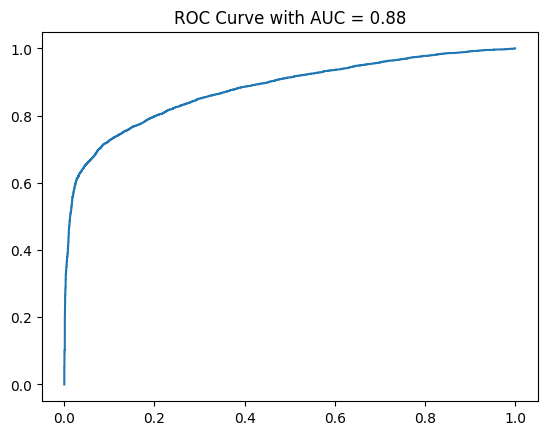

In [18]:


# Inicjalizacja modelu regresji logistycznej
lg = LogisticRegression()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Parametr regularyzacji
    'penalty': ['l1', 'l2'],       # Typ regularyzacji
    'solver': ['liblinear']        # Algorytm optymalizacji (liblinear jest dobrym wyborem dla małych zbiorów danych)
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=lg, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_lg = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train4 = best_lg.predict(x_train5)
y_pred_test4 = best_lg.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train4))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test4))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train4))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test4))

# cross_val_scores = cross_val_score(best_lg, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test4 = best_lg.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test4)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test4)))
plt.show()

## GradientBoostingClassifier

Najlepsze parametry:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}
Accuracy on Training set:  0.8525750488776697
Accuracy on Test set:  0.8453485782166457

Training Results

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     20189
           1       0.90      0.79      0.84     20218

    accuracy                           0.85     40407
   macro avg       0.86      0.85      0.85     40407
weighted avg       0.86      0.85      0.85     40407

Testing Results

              precision    recall  f1-score   support

           0       0.80      0.91      0.86      6749
           1       0.90      0.78      0.83      6720

    accuracy                           0.85     13469
   macro avg       0.85      0.85      0.84     13469
weighted avg       0.85      0.85      0.84     13469



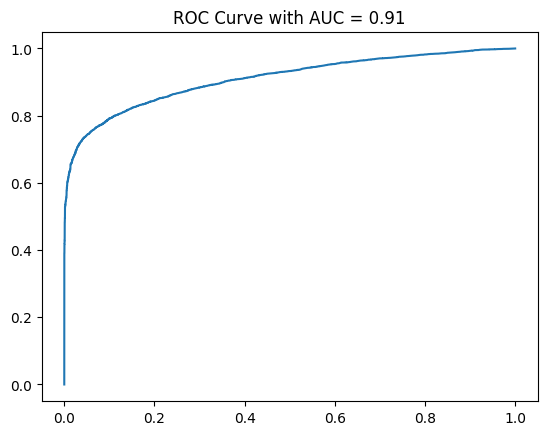

In [19]:


# Inicjalizacja modelu Gradient Boosting Classifier
gb = GradientBoostingClassifier()

# Definiowanie siatki hiperparametrów do przetestowania
param_grid = {
    'n_estimators': [100, 200, 300],  # Liczba drzew w ensemble
    'learning_rate': [0.01, 0.1, 0.2], # Szybkość uczenia
    'max_depth': [3, 5, 7],            # Maksymalna głębokość drzewa
    'min_samples_split': [2, 4],       # Minimalna liczba próbek wymagana do podziału węzła
    'min_samples_leaf': [1, 2]         # Minimalna liczba próbek w liściu
}

# Utworzenie obiektu GridSearchCV
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=5, scoring='accuracy')

# Przeszukiwanie siatki parametrów
grid_search.fit(x_train5, y_train5)

# Najlepsze parametry i najlepszy model
print("Najlepsze parametry: ", grid_search.best_params_)
best_gb = grid_search.best_estimator_

# Predykcje na zbiorze treningowym i testowym
ypred_train6 = best_gb.predict(x_train5)
y_pred_test6 = best_gb.predict(x_test5)

# Ocena modelu
print("Accuracy on Training set: ", accuracy_score(y_train5, ypred_train6))
print("Accuracy on Test set: ", accuracy_score(y_test5, y_pred_test6))
print("\nTraining Results\n")
print(classification_report(y_train5, ypred_train6))
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test6))

# cross_val_scores = cross_val_score(best_gb, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

# Krzywa ROC
y_proba_test6 = best_gb.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test6)
plt.plot(fpr, tpr)
plt.title("ROC Curve with AUC = {:.2f}".format(roc_auc_score(y_test5, y_proba_test6)))
plt.show()

## KNN

In [20]:
knn = KNeighborsClassifier()
knn.fit(x_train5, y_train5)


KNeighborsClassifier()

In [21]:
grid_cv = GridSearchCV(KNeighborsClassifier(), 
                       param_grid={
                           "n_neighbors": range(1, 50)
                       }, cv=5, scoring="f1", 
                       verbose=1, n_jobs=6)


In [22]:
grid_cv.fit(x_train5, 
            y_train5)

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=6,
             param_grid={'n_neighbors': range(1, 50)}, scoring='f1', verbose=1)

In [23]:
grid_cv.best_score_


0.7832247287027245

In [24]:
knn = grid_cv.best_estimator_
knn

KNeighborsClassifier(n_neighbors=7)

In [25]:
ypred_train7 = grid_cv.predict(x_train5)
y_pred_test7 = grid_cv.predict(x_test5)
print("XGBClassifier Accuracy: ",accuracy_score(y_test5, y_pred_test7))

XGBClassifier Accuracy:  0.8078550746157844


In [26]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train7))

Training Results

              precision    recall  f1-score   support

           0       0.79      0.94      0.86     20189
           1       0.93      0.74      0.83     20218

    accuracy                           0.84     40407
   macro avg       0.86      0.84      0.84     40407
weighted avg       0.86      0.84      0.84     40407



In [27]:
print("Training Results\n")
print(classification_report(y_test5, y_pred_test7))

Training Results

              precision    recall  f1-score   support

           0       0.75      0.92      0.83      6749
           1       0.90      0.70      0.78      6720

    accuracy                           0.81     13469
   macro avg       0.82      0.81      0.81     13469
weighted avg       0.82      0.81      0.81     13469



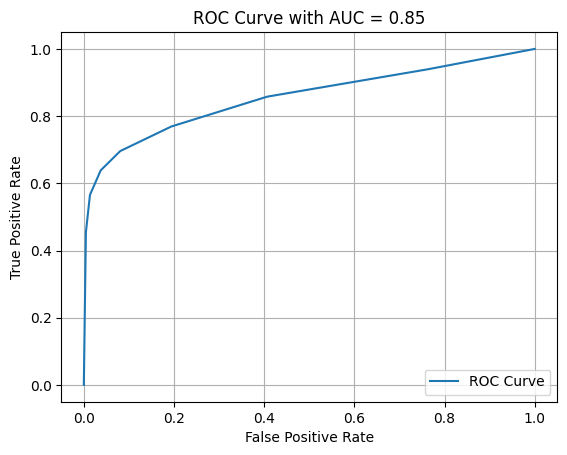

In [28]:
# cross_val_scores = cross_val_score(grid_cv, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

y_proba_test = grid_cv.predict_proba(x_test5)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SIECI NEURONOWE

## ANN

In [29]:
ann = tf.keras.models.Sequential()

In [30]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)


In [31]:
ann.add(tf.keras.layers.Dense(units=16, activation='relu'))

In [32]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [33]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [34]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [35]:
ann.fit(x_train5, y_train5, batch_size = 32, epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop])

Epoch 1/100


1263/1263 [==============================] - 18s 9ms/step - loss: 0.4703 - accuracy: 0.7805 - val_loss: 0.4207 - val_accuracy: 0.8133
Epoch 2/100
1263/1263 [==============================] - 11s 9ms/step - loss: 0.4161 - accuracy: 0.8162 - val_loss: 0.4043 - val_accuracy: 0.8257
Epoch 3/100
1263/1263 [==============================] - 10s 8ms/step - loss: 0.4024 - accuracy: 0.8228 - val_loss: 0.3933 - val_accuracy: 0.8286
Epoch 4/100
1263/1263 [==============================] - 10s 8ms/step - loss: 0.3930 - accuracy: 0.8264 - val_loss: 0.3862 - val_accuracy: 0.8318
Epoch 5/100
1263/1263 [==============================] - 11s 8ms/step - loss: 0.3864 - accuracy: 0.8298 - val_loss: 0.3844 - val_accuracy: 0.8327
Epoch 6/100
1263/1263 [==============================] - 11s 9ms/step - loss: 0.3818 - accuracy: 0.8304 - val_loss: 0.3800 - val_accuracy: 0.8329
Epoch 7/100
1263/1263 [==============================] - 10s 8ms/step - loss: 0.3789 - accuracy: 0.8325 - val_loss: 0.3768

In [36]:
ypred_train8 = ann.predict(x_train5)
y_pred_test8 = ann.predict(x_test5)

y_pred_test8 = (y_pred_test8 > 0.5)
ypred_train8 = (ypred_train8 > 0.5)
print(np.concatenate((y_pred_test8.reshape(len(y_pred_test8),1), y_test5.reshape(len(y_test5),1)),1))

421/421 [==============================] - 1s 3ms/step
[[0 0]
 [1 1]
 [0 0]
 ...
 [1 1]
 [1 1]
 [1 1]]


In [37]:
accuracy_score(y_test5, y_pred_test8)

0.8461652683940901

In [38]:
print("Training Results\n")
print(classification_report(y_train5, ypred_train8))

Training Results

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     20189
           1       0.92      0.76      0.83     20218

    accuracy                           0.85     40407
   macro avg       0.86      0.85      0.85     40407
weighted avg       0.86      0.85      0.85     40407



In [39]:
print('Testing Results\n')
print(classification_report(y_test5, y_pred_test8))

Testing Results

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      6749
           1       0.93      0.75      0.83      6720

    accuracy                           0.85     13469
   macro avg       0.86      0.85      0.84     13469
weighted avg       0.86      0.85      0.84     13469



177/421 [===========>..................] - ETA: 1s

421/421 [==============================] - 3s 5ms/step


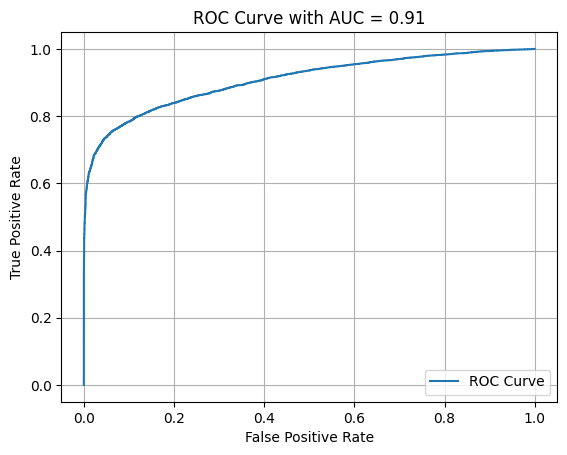

In [40]:
# cross_val_scores = cross_val_score(ann, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = ann.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [41]:

tf.random.set_seed(42)


model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(6,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_2.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_2.fit(x_train5,y_train5,epochs = 100)

Epoch 1/100
1263/1263 [==============================] - 13s 7ms/step - loss: 0.4597 - accuracy: 0.7861
Epoch 2/100
1263/1263 [==============================] - 8s 6ms/step - loss: 0.4149 - accuracy: 0.8148
Epoch 3/100
1263/1263 [==============================] - 8s 6ms/step - loss: 0.3999 - accuracy: 0.8219
Epoch 4/100
1263/1263 [==============================] - 8s 6ms/step - loss: 0.3886 - accuracy: 0.8284
Epoch 5/100
1263/1263 [==============================] - 6s 4ms/step - loss: 0.3816 - accuracy: 0.8300
Epoch 6/100
1263/1263 [==============================] - 8s 6ms/step - loss: 0.3773 - accuracy: 0.8332
Epoch 7/100
1263/1263 [==============================] - 7s 6ms/step - loss: 0.3742 - accuracy: 0.8343
Epoch 8/100
1263/1263 [==============================] - 7s 6ms/step - loss: 0.3726 - accuracy: 0.8352
Epoch 9/100
1263/1263 [==============================] - 7s 5ms/step - loss: 0.3713 - accuracy: 0.8357
Epoch 10/100
1263/1263 [==============================] - 8s 6ms/step - 

In [42]:
model_2.evaluate(x_test5,y_test5)

421/421 [==============================] - 3s 5ms/step - loss: 0.3563 - accuracy: 0.8422


[0.3563371002674103, 0.8422303199768066]

In [43]:
ypred_train12 = model_2.predict(x_train5)
y_pred_test12 = model_2.predict(x_test5)

y_pred_test12 = (y_pred_test12 > 0.5)
ypred_train12 = (ypred_train12 > 0.5)

print(classification_report(y_train5,ypred_train12))
print(classification_report(y_test5,y_pred_test12))

421/421 [==============================] - 2s 4ms/step
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     20189
           1       0.90      0.77      0.83     20218

    accuracy                           0.85     40407
   macro avg       0.85      0.85      0.85     40407
weighted avg       0.85      0.85      0.85     40407

              precision    recall  f1-score   support

           0       0.79      0.92      0.85      6749
           1       0.91      0.76      0.83      6720

    accuracy                           0.84     13469
   macro avg       0.85      0.84      0.84     13469
weighted avg       0.85      0.84      0.84     13469



421/421 [==============================] - 3s 5ms/step


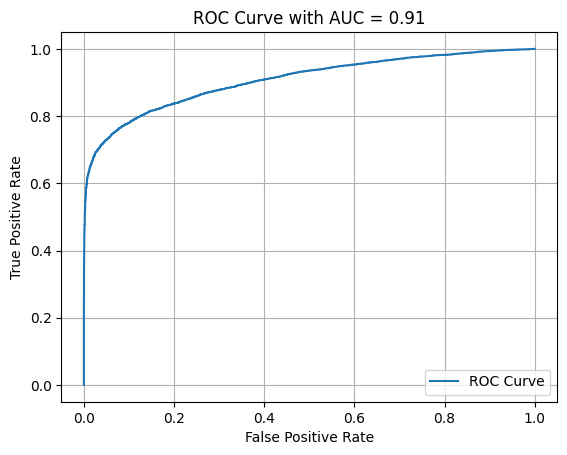

In [44]:
# cross_val_scores = cross_val_score(model_2, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model_2.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inne próby sieci neuronowych 

In [45]:
model1 = Sequential()
model1.add(Dense(units=16,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=15,activation='relu'))
model1.add(Dropout(0.5))

model1.add(Dense(units=1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy', optimizer='adam')

In [46]:
model1.fit(x=x_train5, 
          y=y_train5, 
          epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100


1263/1263 [==============================] - 13s 8ms/step - loss: 0.5612 - val_loss: 0.4414
Epoch 2/100
1263/1263 [==============================] - 9s 7ms/step - loss: 0.4766 - val_loss: 0.4268
Epoch 3/100
1263/1263 [==============================] - 9s 7ms/step - loss: 0.4621 - val_loss: 0.4193
Epoch 4/100
1263/1263 [==============================] - 9s 7ms/step - loss: 0.4546 - val_loss: 0.4118
Epoch 5/100
1263/1263 [==============================] - 9s 7ms/step - loss: 0.4487 - val_loss: 0.4091
Epoch 6/100
1263/1263 [==============================] - 9s 7ms/step - loss: 0.4438 - val_loss: 0.4050
Epoch 7/100
1263/1263 [==============================] - 9s 7ms/step - loss: 0.4391 - val_loss: 0.4004
Epoch 8/100
1263/1263 [==============================] - 9s 7ms/step - loss: 0.4372 - val_loss: 0.3988
Epoch 9/100
1263/1263 [==============================] - 10s 8ms/step - loss: 0.4339 - val_loss: 0.3966
Epoch 10/100
1263/1263 [==============================] - 9s 7ms/step - loss: 0.436

In [47]:
ypred_train13 = model1.predict(x_train5)
y_pred_test13 = model1.predict(x_test5)

y_pred_test13 = (y_pred_test13 > 0.5)
ypred_train13 = (ypred_train13 > 0.5)

print(classification_report(y_train5,ypred_train13))
print(classification_report(y_test5,y_pred_test13))

421/421 [==============================] - 3s 6ms/step
              precision    recall  f1-score   support

           0       0.81      0.90      0.85     20189
           1       0.88      0.79      0.83     20218

    accuracy                           0.84     40407
   macro avg       0.85      0.84      0.84     40407
weighted avg       0.85      0.84      0.84     40407

              precision    recall  f1-score   support

           0       0.80      0.90      0.85      6749
           1       0.89      0.78      0.83      6720

    accuracy                           0.84     13469
   macro avg       0.85      0.84      0.84     13469
weighted avg       0.85      0.84      0.84     13469



421/421 [==============================] - 3s 5ms/step


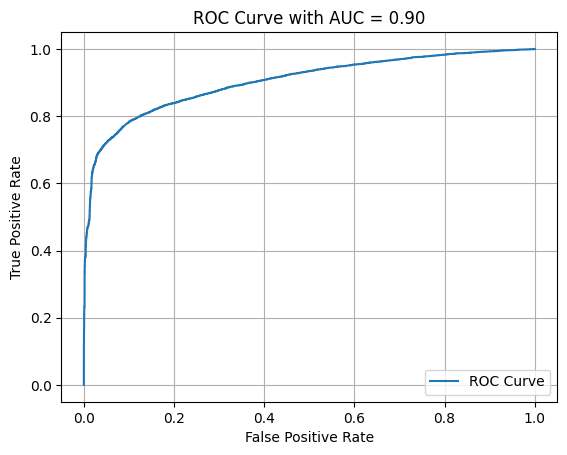

In [48]:
# cross_val_scores = cross_val_score(model1, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model1.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inna proba 

In [49]:

tf.random.set_seed(42)



model_22 = tf.keras.Sequential([
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(32,activation = 'relu'),
  tf.keras.layers.Dense(16,activation = 'relu'),
  tf.keras.layers.Dense(9,activation = 'relu'),
  tf.keras.layers.Dense(1,activation = 'sigmoid')                            
])


model_22.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr=0.001),
                metrics = ['accuracy'])


history_2 = model_22.fit(x_train5,y_train5,epochs = 100)

Epoch 1/100
1263/1263 [==============================] - 16s 9ms/step - loss: 0.4472 - accuracy: 0.7926
Epoch 2/100
1263/1263 [==============================] - 12s 10ms/step - loss: 0.3946 - accuracy: 0.8231
Epoch 3/100
1263/1263 [==============================] - 12s 9ms/step - loss: 0.3836 - accuracy: 0.8303
Epoch 4/100
1263/1263 [==============================] - 11s 9ms/step - loss: 0.3796 - accuracy: 0.8311
Epoch 5/100
1263/1263 [==============================] - 11s 9ms/step - loss: 0.3766 - accuracy: 0.8332
Epoch 6/100
1263/1263 [==============================] - 10s 8ms/step - loss: 0.3741 - accuracy: 0.8345
Epoch 7/100
1263/1263 [==============================] - 12s 9ms/step - loss: 0.3735 - accuracy: 0.8341
Epoch 8/100
1263/1263 [==============================] - 12s 9ms/step - loss: 0.3714 - accuracy: 0.8344
Epoch 9/100
1263/1263 [==============================] - 10s 8ms/step - loss: 0.3714 - accuracy: 0.8359
Epoch 10/100
1263/1263 [==============================] - 11s 9

In [50]:
model_22.evaluate(x_test5,y_test5)

421/421 [==============================] - 6s 11ms/step - loss: 0.3554 - accuracy: 0.8445


[0.35537248849868774, 0.8444576263427734]

In [51]:
ypred_train22 = model_22.predict(x_train5)
y_pred_test22 = model_22.predict(x_test5)

y_pred_test22 = (y_pred_test22 > 0.5)
ypred_train22 = (ypred_train22 > 0.5)

print(classification_report(y_train5,ypred_train22))
print(classification_report(y_test5,y_pred_test22))

421/421 [==============================] - 5s 10ms/step
              precision    recall  f1-score   support

           0       0.80      0.92      0.86     20189
           1       0.91      0.78      0.84     20218

    accuracy                           0.85     40407
   macro avg       0.86      0.85      0.85     40407
weighted avg       0.86      0.85      0.85     40407

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      6749
           1       0.91      0.76      0.83      6720

    accuracy                           0.84     13469
   macro avg       0.85      0.84      0.84     13469
weighted avg       0.85      0.84      0.84     13469



 16/421 [>.............................] - ETA: 3s  

421/421 [==============================] - 4s 9ms/step


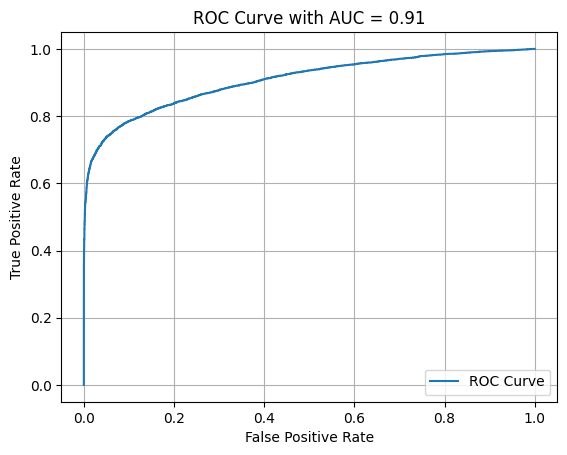

In [52]:
# cross_val_scores = cross_val_score(model_22, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model_22.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## inny model

In [53]:
model2 = Sequential()



model2.add(Dense(16,  activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(10, activation='relu'))
model2.add(Dropout(0.2))

model2.add(Dense(units=1,activation='sigmoid'))

model2.compile(loss='binary_crossentropy', optimizer='adam')

In [54]:
model2.fit(x=x_train5, 
          y=y_train5, 
          epochs=100,
          validation_data=(x_test5, y_test5), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/100


1263/1263 [==============================] - 23s 15ms/step - loss: 0.5044 - val_loss: 0.4274
Epoch 2/100
1263/1263 [==============================] - 18s 14ms/step - loss: 0.4462 - val_loss: 0.4199
Epoch 3/100
1263/1263 [==============================] - 17s 13ms/step - loss: 0.4351 - val_loss: 0.4104
Epoch 4/100
1263/1263 [==============================] - 17s 13ms/step - loss: 0.4267 - val_loss: 0.4049
Epoch 5/100
1263/1263 [==============================] - 18s 14ms/step - loss: 0.4210 - val_loss: 0.4032
Epoch 6/100
1263/1263 [==============================] - 18s 14ms/step - loss: 0.4184 - val_loss: 0.3957
Epoch 7/100
1263/1263 [==============================] - 19s 15ms/step - loss: 0.4118 - val_loss: 0.3916
Epoch 8/100
1263/1263 [==============================] - 19s 15ms/step - loss: 0.4075 - val_loss: 0.3876
Epoch 9/100
1263/1263 [==============================] - 18s 15ms/step - loss: 0.4025 - val_loss: 0.3830
Epoch 10/100
1263/1263 [==============================] - 18s 14ms/

In [55]:
ypred_train14 = model2.predict(x_train5)
y_pred_test14 = model2.predict(x_test5)

y_pred_test14 = (y_pred_test14 > 0.5)
ypred_train14 = (ypred_train14 > 0.5)

print("Training Results\n")
print(classification_report(y_train5,ypred_train14))
print("Testing Results\n")
print(classification_report(y_test5,y_pred_test14))

421/421 [==============================] - 1s 3ms/step
Training Results

              precision    recall  f1-score   support

           0       0.80      0.92      0.86     20189
           1       0.91      0.77      0.83     20218

    accuracy                           0.85     40407
   macro avg       0.85      0.85      0.84     40407
weighted avg       0.85      0.85      0.84     40407

Testing Results

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      6749
           1       0.91      0.77      0.83      6720

    accuracy                           0.85     13469
   macro avg       0.86      0.85      0.85     13469
weighted avg       0.86      0.85      0.85     13469



421/421 [==============================] - 1s 2ms/step


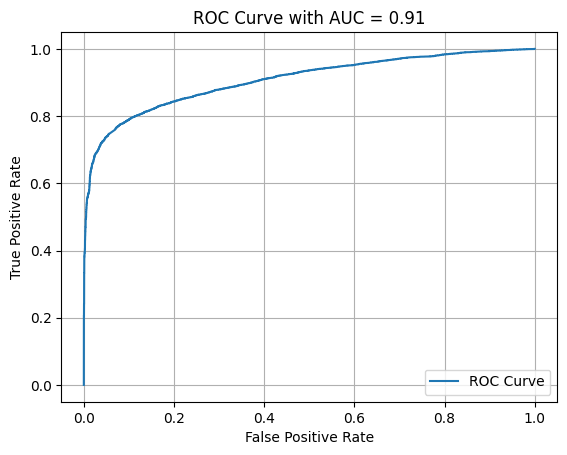

In [56]:
# cross_val_scores = cross_val_score(model2, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))
y_proba_test = model2.predict(x_test5).flatten()

fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## SVC

In [57]:
model = SVC(probability=True)

In [58]:
model.fit(x_train5,y_train5)

SVC(probability=True)

In [59]:


ypred_train = model.predict(x_train5)
y_pred_test = model.predict(x_test5)


print(classification_report(y_train5,ypred_train))
print(classification_report(y_test5,y_pred_test))

              precision    recall  f1-score   support

           0       0.77      0.93      0.84     20189
           1       0.91      0.72      0.80     20218

    accuracy                           0.82     40407
   macro avg       0.84      0.82      0.82     40407
weighted avg       0.84      0.82      0.82     40407

              precision    recall  f1-score   support

           0       0.77      0.93      0.84      6749
           1       0.92      0.72      0.81      6720

    accuracy                           0.83     13469
   macro avg       0.84      0.83      0.83     13469
weighted avg       0.84      0.83      0.83     13469



In [60]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [61]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [62]:
grid.fit(x_train5,y_train5)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.804 total time= 1.3min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.809 total time= 1.4min
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.802 total time= 1.3min
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.803 total time= 1.4min
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.802 total time= 1.5min
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.793 total time= 1.5min
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.795 total time= 1.5min
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.783 total time= 1.5min
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.791 total time= 1.3min
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.785 total time= 1.3min
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.774 total time= 2.0min
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.774 total time= 2.0min
[CV 3/5] END .....C=0.1, gam

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [63]:
grid.best_params_

{'C': 100, 'gamma': 1, 'kernel': 'rbf'}

In [64]:
grid.best_estimator_

SVC(C=100, gamma=1)

In [65]:
ypred_train = grid.predict(x_train5)
y_pred_test = grid.predict(x_test5)


print(classification_report(y_train5,ypred_train))
print(classification_report(y_test5,y_pred_test))

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     20189
           1       0.93      0.76      0.84     20218

    accuracy                           0.85     40407
   macro avg       0.86      0.85      0.85     40407
weighted avg       0.86      0.85      0.85     40407

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      6749
           1       0.93      0.74      0.82      6720

    accuracy                           0.84     13469
   macro avg       0.86      0.84      0.84     13469
weighted avg       0.86      0.84      0.84     13469



Training Results

              precision    recall  f1-score   support

           0       0.80      0.94      0.86     20189
           1       0.93      0.76      0.84     20218

    accuracy                           0.85     40407
   macro avg       0.86      0.85      0.85     40407
weighted avg       0.86      0.85      0.85     40407

Testing Results

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      6749
           1       0.93      0.74      0.82      6720

    accuracy                           0.84     13469
   macro avg       0.86      0.84      0.84     13469
weighted avg       0.86      0.84      0.84     13469



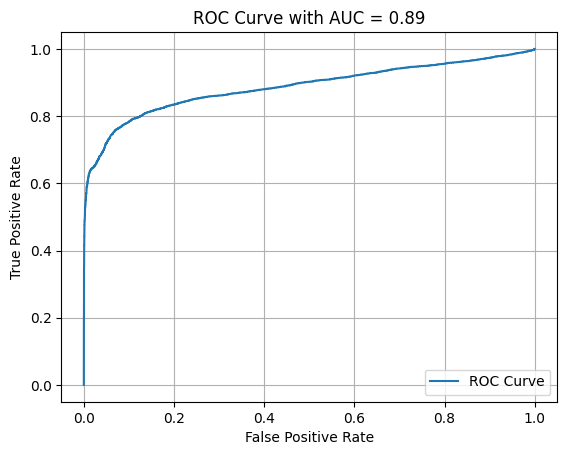

In [66]:
model3 = SVC(C=100, gamma=1, kernel='rbf', probability=True)
model3.fit(x_train5, y_train5)

ypred_train14 = model3.predict(x_train5)
y_pred_test14 = model3.predict(x_test5)

print("Training Results\n")
print(classification_report(y_train5, ypred_train14))
print("Testing Results\n")
print(classification_report(y_test5, y_pred_test14))

y_proba_test = model3.predict_proba(x_test5)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test5, y_proba_test)

# cross_val_scores = cross_val_score(model3, x_train5, y_train5, cv=5)
# print("Cross-validation scores:", cross_val_scores)
# print("Average cross-validation score:", np.mean(cross_val_scores))

plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with AUC = {:.2f}'.format(roc_auc_score(y_test5, y_proba_test)))
plt.legend(loc='lower right')
plt.grid(True)
plt.show()